<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S8_C2_kmeans_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [3]:
from google.colab import drive # Conectanonos con google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/BIT_BootCamp_IA/DataSET/Agrupamiento'
import os    # la librería necesaria para la ruta de la carpeta
os.chdir(folder_path) # ruta de la carpeta

#mostar lista de archivos
os.listdir()

['Mall_Customers.csv']

In [6]:
df = pd.read_csv('Mall_Customers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
df = df.drop(['CustomerID'], axis=1)
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [9]:
# Inicializar el encoder
le = LabelEncoder()
# Aplicar el encoder a la columna 'Gender'
df['Gender_TAG'] = le.fit_transform(df['Gender'])

In [10]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [11]:
df_tag = df

In [12]:
df = df.drop(['Gender'], axis=1)
df.head(3)

,Age,Annual Income (k$),Spending Score (1-100),Gender_TAG
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0


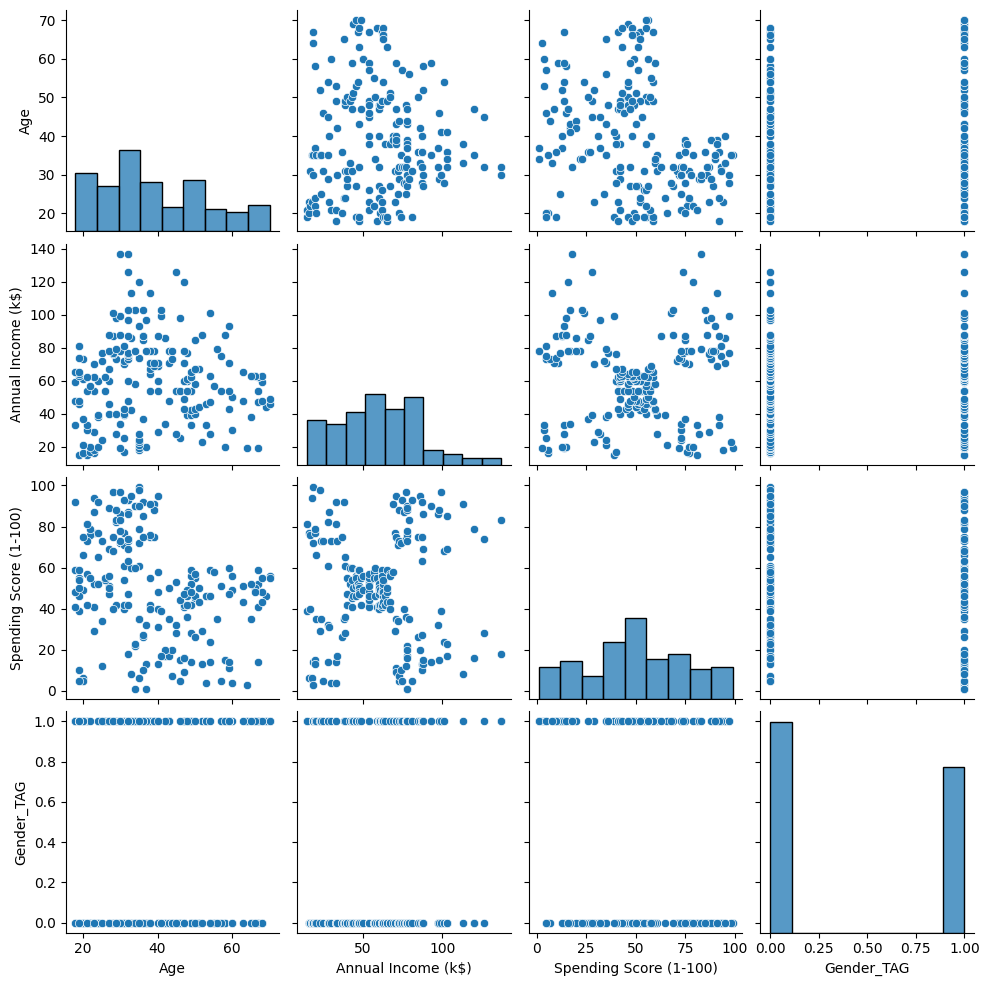

In [13]:
sns.pairplot(df)

In [14]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100),Gender_TAG
Age,1.000000,-0.012398,-0.327227,0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,-0.058109
Gender_TAG,0.060867,0.056410,-0.058109,1.000000


# Selección de variables

* Se observa que los hombres y las mujeres tienen los mismos comportamientos de edad, ingreso y compras por lo tanto se elimina del df

In [15]:
df = df.drop(['Gender_TAG'], axis=1)
df.head(3)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6


# Parte 2. Cuántos clusters necesitamos?


Aplicamos el metodo del cliente donde medimos la inercia del grupos en busca del punto de inflexoión

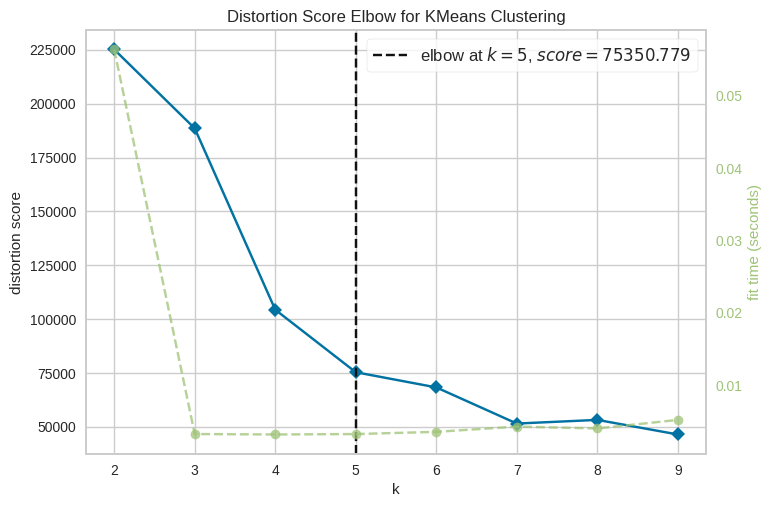

In [16]:
# Codigo del notebook   https://www.kaggle.com/code/datark1/customers-clustering-k-means-dbscan-and-ap/notebook
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df)
visualizer.show()
plt.show()

Con el ánalisis del método del codo se observa que un número pertinente de centroides es 5.

In [37]:
model_5k = KMeans(n_clusters=6, random_state=1).fit(df)
model_5k.cluster_centers_

array([[ 43.28571429,  54.81818182,  49.88311688],
       [ 42.63636364, 108.18181818,  21.27272727],
       [ 25.52173913,  26.30434783,  78.56521739],
       [ 32.69230769,  86.53846154,  82.12820513],
       [ 45.2173913 ,  26.30434783,  20.91304348],
       [ 39.48148148,  78.37037037,  17.55555556]])

In [38]:
model_5k.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

Text(0.5, 0, 'Spending Score (1-100)')

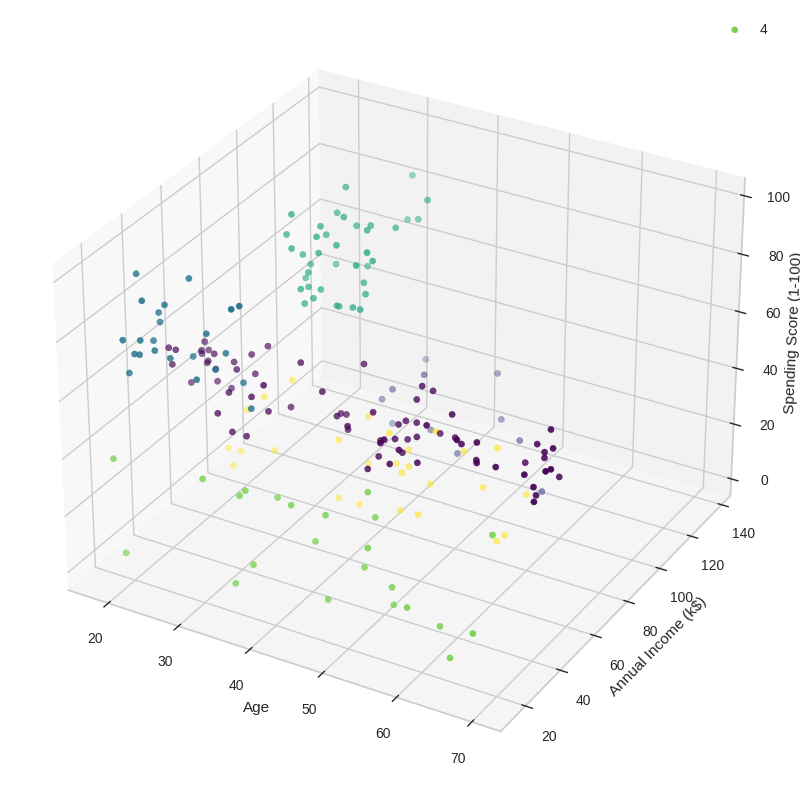

In [39]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# Plot data points
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=model_5k.labels_, cmap = 'viridis' )
ax.legend(model_5k.labels_)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

In [40]:
df.head(5)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### Etiquetar  el df en los clusters
Al df original se le agrega la columnas con las etiquetas de los clusters


In [41]:
df_5k = df.copy()
df_5k['Cluster'] = model_5k.labels_
df_5k.head(20)

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,4
1,21,15,81,2
2,20,16,6,4
3,23,16,77,2
4,31,17,40,4
5,22,17,76,2
6,35,18,6,4
7,23,18,94,2
8,64,19,3,4
9,30,19,72,2


In [42]:
df_5k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
 3   Cluster                 200 non-null    int32
dtypes: int32(1), int64(3)
memory usage: 5.6 KB


In [43]:
df_5k.groupby('Cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,43.285714,54.818182,49.883117
1,42.636364,108.181818,21.272727
2,25.521739,26.304348,78.565217
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043
5,39.481481,78.370370,17.555556


In [44]:
cluster_0 = df_5k.loc[df_5k['Cluster'] == 0]
cluster_0.describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,77.000000,77.000000,77.000000,77.0
mean,43.285714,54.818182,49.883117,0.0
std,16.602835,8.291923,5.991165,0.0
min,18.000000,40.000000,40.000000,0.0
25%,27.000000,48.000000,46.000000,0.0
50%,47.000000,54.000000,50.000000,0.0
75%,55.000000,62.000000,55.000000,0.0
max,70.000000,69.000000,60.000000,0.0


In [45]:
cluster_1 = df_5k.loc[df_5k['Cluster'] == 1]
cluster_1.describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,11.000000,11.000000,11.000000,11.0
mean,42.636364,108.181818,21.272727,1.0
std,8.663403,13.998701,9.001010,0.0
min,32.000000,93.000000,8.000000,1.0
25%,35.500000,98.500000,15.500000,1.0
50%,41.000000,103.000000,18.000000,1.0
75%,46.500000,116.500000,26.000000,1.0
max,59.000000,137.000000,39.000000,1.0


# Parte X. Análisis de Segmento de clientes (clusters)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


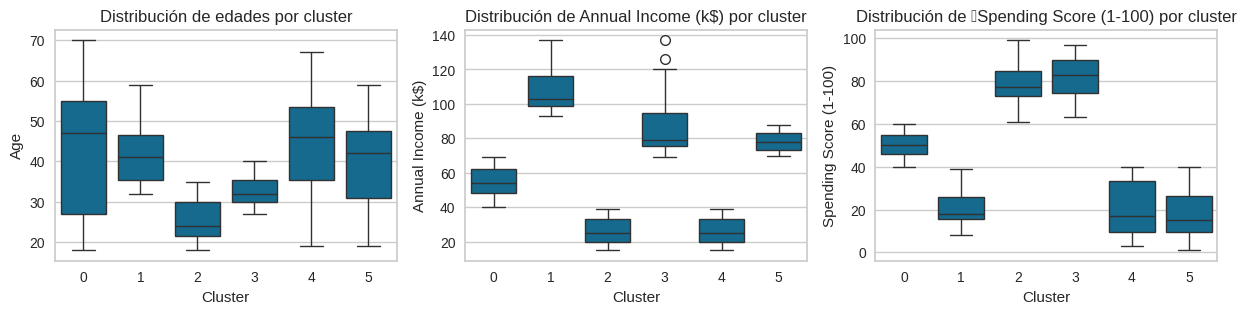

In [46]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.boxplot(x='Cluster', y='Age', data=df_5k)
plt.title('Distribución de edades por cluster')
plt.subplot(1,3,2)
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df_5k)
plt.title('Distribución de Annual Income (k$) por cluster')
plt.subplot(1,3,3)
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df_5k)
plt.title('Distribución de 	Spending Score (1-100) por cluster')
plt.show()

## Cluster 4

**Age:** The age distribution is very wide, with a median age of 47 years. 50% of these customers are between 35 and 53 years old.

**Annual Income:** This group has a low income, with most earning between 19k and 33k.

**Spending Score:** This group exhibits a lower spending range, with scores approximately between 9 and 33. (approximately 9 to 33).

In conclusion, this cluster represents a population with low income levels and conservative spending habits, likely prioritizing essential needs over discretionary expenses.

Expert Recommendation: Focus on campaigns for essential goods and basic necessities, offering value-driven options that cater to their budget constraints.

### Cluster 0.

* **Edad:** la distribución es muy amplia, la mediada la edad es de 50 años, el 50% de estos clientes tienen edades entre '28 y 53'.
* **Ingreso anual:** este grupo de personas tiene ingresos medio-bajo, la mayoria ganan entre (45 a 61 k)
* **Puntaje de gasto:** este grupo tiene gasto moderado (45 y 55 aprox.)


En conclusión este Cluster representa a la población que tiene ingresos medios y patrones de consumo medio.

***Experto:*** Prodiar enfocarse en campañas de productos básicos ( mercado, aseo, etc)  

Edad: la distribucion es muy amplia, la mediana la esdad es de 25 años, el 50% de estos clientes tienen edades entre '22 y 30'

Ingreso anual: este grupo de personas tienen ingresos bajos, la mayoria ganan entre (19 a 34 k)

Puntaje de gasto: este grupo tiene gasto alto (73 y 84 aprox.)

En conclusión este Cluster representa a la poblacion que tiene ingresos bajos y patrones de consumo alto.

Experto: podria enfocarse en campañas de productos entree tecnologia de alta gama y productos

### Parte X. MEdición de la calidad de los grupos

La puntuación de silueta es una métrica que mide qué tan similares son los puntos dentro de un cluster en comparación con los puntos de otros clusters.

Donde:

( a ): Distancia promedio entre un punto y los demás puntos del mismo cluster.
( b ): Distancia promedio entre un punto y los puntos del cluster más cercano.
La puntuación varía entre -1 y 1:

Valores cercanos a 1 indican que los puntos están bien agrupados.
Valores cercanos a 0 indican que los puntos están cerca de los límites entre clusters.
Valores negativos indican que los puntos están mal asignados.

In [47]:
from sklearn.metrics import silhouette_score, silhouette_samples
labels = model_5k.labels_
silhouette_avg = silhouette_score(df, labels)
print("Puntuación de silueta:", silhouette_avg)

Puntuación de silueta: 0.41481348123195255


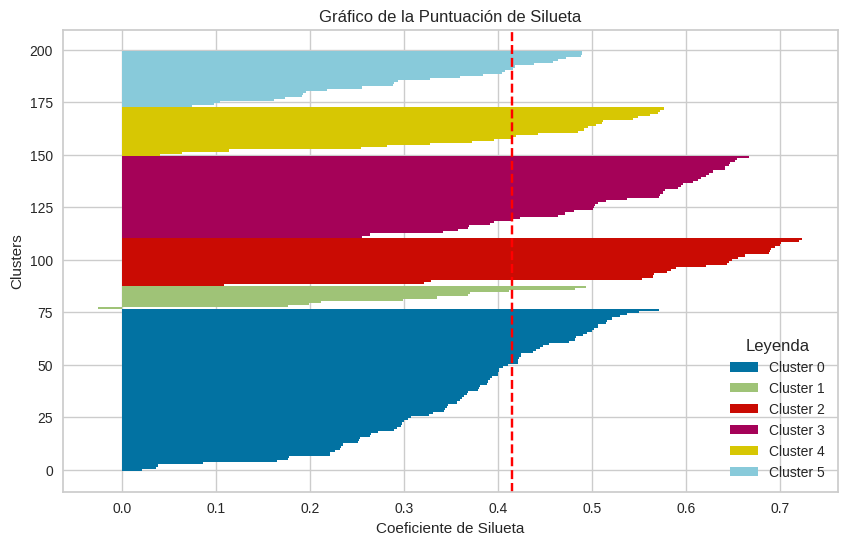

In [48]:
# Cálculo de las puntuaciones de silueta por punto
silhouette_vals = silhouette_samples(df, labels)

# Gráfico de silueta
plt.figure(figsize=(10, 6))
y_lower, y_upper = 0, 0
for i in range(model_5k.n_clusters):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1,  label=f'Cluster {i}')
    y_lower += len(cluster_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.title("Gráfico de la Puntuación de Silueta")
plt.xlabel("Coeficiente de Silueta")
plt.ylabel("Clusters")
plt.legend(loc="best", title="Leyenda")
plt.show()

In [49]:
# Crear un DataFrame con las columnas necesarias
import plotly.express as px
df_3d = df.copy()
df_3d['Cluster'] = model_5k.labels_

# Crear el gráfico 3D interactivo
fig = px.scatter_3d(df_3d,
                    x='Age',
                    y='Annual Income (k$)',
                    z='Spending Score (1-100)',
                    color='Cluster',
                    color_continuous_scale='viridis',
                    title='K-Means Clustering Results',
                    labels={'Age': 'Age', 'Annual Income (k$)': 'Annual Income (k$)', 'Spending Score (1-100)': 'Spending Score (1-100)'},
                    opacity=0.7)

# Mostrar el gráfico interactivo
fig.show()